In [230]:
# Importing libraries and packages to use for deep learning
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error,f1_score,recall_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
import tensorflow as tf

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [231]:
df = pd.read_csv('./Clean_dataframe/clean_df.csv')

In [244]:
# Picked top 12 correlated features with y
features = ['Injury_Severity','AlcoholUse_Drv1','AlcoholUse_Drv2','Age_Drv1','DrugUse_Drv1','Head_On','Left_Turn',
            'Other','Rear_End','Same_Direction','Not_Clear_Weather','Not_Dry_Surface']
X = df[features]
y = df['Injury']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

In [245]:
#Scaling is required in NN and RNN
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

## Neural Network:

In [246]:
# construct network
model = Sequential() 
model.add(Dense(32, input_shape=(12,), activation='relu')) #first layer
model.add(Dense(32, activation='relu'))  #second layer
model.add(Dense(1, activation='sigmoid')) #output layer

In [247]:
# Compiling model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [248]:
# Model fitting
history = model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test),  epochs=10, batch_size=512, verbose=0)

In [249]:
# Predictions
test_preds = model.predict(X_test_sc)
test_preds

array([[0.09744501],
       [0.10186484],
       [0.0872924 ],
       ...,
       [0.18965551],
       [0.21153742],
       [0.08540174]], dtype=float32)

In [250]:
test_preds.shape

(9779, 1)

In [251]:
y_test.shape

(9779,)

In [252]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, test_preds.round())


array([[6698,   16],
       [1090, 1975]])

NN Model Sensitivity score:  0.6443719412724307


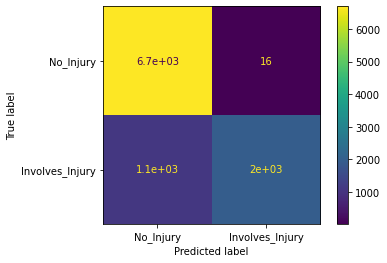

In [253]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
logistic_cm = confusion_matrix(y_test, test_preds.round())
disp = ConfusionMatrixDisplay(logistic_cm, display_labels=['No_Injury', 'Involves_Injury']);
disp.plot();
#Save TN/FP/FN/TP values.
tn, fp, fn, tp = confusion_matrix(y_test, test_preds.round()).ravel()
# By hand
sensitivity = tp / (tp + fn)
print('NN Model Sensitivity score: ',sensitivity)

- Here we can see that NN model didn't do better than ADA boosting model, so we will stick with ADA boosting model.